# Exercício 1 - Ligações para o 911

### Nos EUA, o número 911 é destinado à emergências. O [Kaggle](https://www.kaggle.com/mchirico/montcoalert) disponibilizou dados de ligações para o serviço:

* lat: Variável String, Latitude
* lng: Variável String, Longitude
* desc: Variável String, Descrição da Chamada de Emergência
* zip: Variável String, CEP
* título: Variável String, Título
* timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
* twp: Variável String, Township
* addr: Variável String, Endereço
* e: Variável String, variável Dummy (sempre 1)



### Leia o arquivo csv (911.csv) como um dataframe chamado _calls_

In [133]:
import pandas as pd
import matplotlib

In [64]:
calls = pd.read_csv('911.csv')

In [65]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Quantas linhas e colunas tem o arquivo? Qual a quantidade de memória necessária para carregá-lo?

In [66]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### Quais são os top 5 CEPs nas chamadas 911?

In [67]:
calls['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

### Quais são os 5 principais municípios nas chamadas 911?

In [68]:
calls['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### Quantos códigos de título únicos existem?

In [127]:
calls['title'].nunique()

110

### Na coluna _title_ existem Razões / Departamentos especificados antes do código do título. Estes são _"EMS", "Fire"  e  "Traffic"_. Crie uma nova coluna chamada _Reason_ que conterá esse valor em cada linha

#### Por exemplo, se o valor da coluna do título for EMS: BACK PAINS / BLESSOR, o valor da coluna Reason será EMS.

In [128]:
calls['reason'] = calls['title'].str.split(':', expand = True)[0]
calls.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday


In [129]:
calls['reason'] = calls['title'].apply(lambda x: x.split(':')[0])
calls.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday


### Qual é a razão mais comum para uma chamada do 911 com base nessa nova coluna?

In [71]:
calls['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

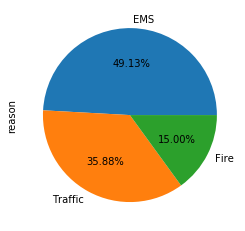

In [140]:
calls.reason.value_counts().plot(kind='pie', autopct='%.2f%%')

### Qual é o tipo de dados dos objetos na coluna *timeStamp*?

In [72]:
type(calls['timeStamp'][0])

str

### Converta a coluna _timeStamp_ para DateTime. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) para essa operação.

In [73]:
calls['timeStamp'] = pd.to_datetime(calls['timeStamp'])
type(calls['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [74]:
calls['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

### Crie 3 novas colunas chamadas _Hour, Month e Day of Week_. Você criará essas colunas com base na coluna timeStamp

In [85]:
calls['hour'] = calls['timeStamp'].dt.hour
calls['month'] = calls['timeStamp'].dt.month
calls['day of week'] = calls['timeStamp'].dt.day_name()

### Observe como o dia da demana é um número inteiro de 0-6. Mapeie os nomes das seqüências reais para o dia da semana, nessa mesma coluna:

- 0 => Mon
- 1 => Tue
- 2 => Wed
- 3 => Thu
- 4 => Fri
- 5 => Sat
- 6 => Sun

In [86]:
calls['day of week']

0         Thursday
1         Thursday
2         Thursday
3         Thursday
4         Thursday
           ...    
99487    Wednesday
99488    Wednesday
99489    Wednesday
99490    Wednesday
99491    Wednesday
Name: day of week, Length: 99492, dtype: object

### Qual a quantidade de chamadas de cada motivo (*Reason*) por mês?

In [145]:
df = calls.groupby(by=['reason','month']).size().unstack(level=0)
df

reason,EMS,Fire,Traffic
month,,,
1,6063,1905,5237
2,5413,1869,4185
3,5832,1590,3679
4,5680,1717,3929
5,5734,1573,4116
6,5720,1796,4270
7,6029,1901,4207
8,4508,1473,3097
12,3898,1096,2975


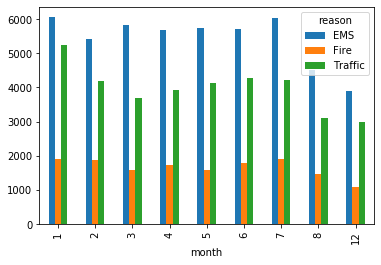

In [146]:
df.plot(kind='bar')

### Qual foi o dia com a maior quantidade de chamadas? Quantas chamadas foram executadas neste dia?

In [148]:
calls['timeStamp'].dt.date.value_counts().head(1)

2016-01-23    913
Name: timeStamp, dtype: int64

### Levando-se em consideração apenas atendimentos feitos às sextas-feiras, qual a hora do dia com o maior número de chamadas?

In [150]:
calls.groupby(by=['day of week','hour']).size()['Friday'].idxmax()

16

### Levando-se em consideração os atendimentos relacionados a incêndio (*Reason* = *Fire*) qual a quantidade de chamados aos sábados?

In [151]:
calls.groupby(by=['reason','day of week']).size()['Fire']['Saturday']

2068